# Image Classification to find   PavBhaji's image or Not .
* I have to find the given image is pav bhaji or not 
* Name "1" folder contain images of pav bhaji
* Naem "0" folder contain images of non pav bhaji

### Actual  Image of pav bhaji
![](https://www.nicepng.com/png/detail/256-2564363_keemapavse-pav-bhaji-hd-png.png)

In [1]:
### Import all necessary lib

In [2]:
import pandas as pd
 
import numpy as np
import matplotlib.pyplot as plt
import cv2

### cv2 -used  how to read an image, how to display it and how to save it back
Read an image
Use the function cv2.imread() to read an image. The image should be in the working directory or a full path of image should be given.

Second argument is a flag which specifies the way image should be read.

* cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
* cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
* cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

* cv2 lib convert  image to some matrix form according to the HSV which are ranges between 0 to 255 

### Libraries Load for training our model 
* using Machine Laerning 
* Using Deep Learning (ANN,CNN)
    * ANN- Artificial Neural Networks (ANN) are multi-layer fully-connected neural nets .They consist of an input layer, multiple hidden layers, and an output layer.
    * CNN - Convolutional Neural Networks (CNN) is one of the variants of neural networks used heavily in the field of Computer Vision.The hidden layers of a CNN typically consist of convolutional layers, pooling layers, fully connected layers, and normalization layers. 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



from keras.layers.recurrent import LSTM,SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


#### Read json file using pandas.read_json()

In [4]:
data = pd.read_json('pavbhaji.json',orient='slice')

In [5]:
data

,dimensions,display_url,edge_liked_by,edge_media_preview_like,edge_media_to_caption,edge_media_to_comment,id,is_video,location,owner,shortcode,tags,taken_at_timestamp,thumbnail_resources,thumbnail_src,urls,video_view_count,comments_disabled
0,"{'height': 734, 'width': 640}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/352...,{'count': 3797},{'count': 3797},{'edges': [{'node': {'text': 'TAG A PAV BHAJI ...,{'count': 52},1834712933156555776,True,None,{'id': '1919686029'},Bl2NbElnIva,"[vadapav, foodgram, foodphotography, foodblogg...",1532934873,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...,0.0,NaN
1,"{'height': 750, 'width': 750}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/b0d...,{'count': 12041},{'count': 12041},{'edges': [{'node': {'text': 'देसी स्टाइल पाव ...,{'count': 325},1826000656302706176,True,"{'has_public_page': True, 'id': '245717485', '...",{'id': '1445587278'},BlXQewejY3Z,"[healthyfood, sokolkata, mumbaifoodie, faridab...",1531897016,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...,0.0,NaN
2,"{'height': 800, 'width': 640}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb4...,{'count': 3544},{'count': 3544},{'edges': [{'node': {'text': 'Pav Bhaji😍😍😋\n.\...,{'count': 18},1849962218902145792,True,"{'has_public_page': True, 'id': '213724095', '...",{'id': '4759392841'},BmsYtYpjkq4,"[foodphotography, mumbaipeople, vascom, delhib...",1534752790,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...,0.0,NaN
3,"{'height': 937, 'width': 750}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/180...,{'count': 1388},{'count': 1388},{'edges': [{'node': {'text': 'Asli Makhan Pav ...,{'count': 91},1828963273137213696,True,"{'has_public_page': True, 'id': '234730336', '...",{'id': '4628040416'},BlhyGgalFDw,"[foodvideo, misscravingbuster, foodblogger, mu...",1532249632,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...,0.0,NaN
4,"{'height': 936, 'width': 750}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/5ee...,{'count': 223},{'count': 223},{'edges': [{'node': {'text': 'Tag a Pav bhaji ...,{'count': 14},1852265507774756864,True,None,{'id': '7798081590'},Bm0kapkn3ha,[],1535027282,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,"{'height': 937, 'width': 750}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/e5f...,{'count': 110},{'count': 110},{'edges': [{'node': {'text': 'Cheesy baked fri...,{'count': 3},1841480084970317056,True,"{'has_public_page': True, 'id': '440427752', '...",{'id': '5689462323'},BmOQGF1nKTE,"[foodphotography, bhaji, pasta, fries, indianf...",1533741643,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/9d8...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb...,0.0,0.0
1496,"{'height': 937, 'width': 750}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/5c3...,{'count': 3446},{'count': 3446},"{'edges': [{'node': {'text': ""Monsoon couldn't...",{'count': 21},1841470588042818304,True,"{'has_public_page': True, 'id': '245717485', '...",{'id': '3303769643'},BmON75InzNm,"[cravings, foodcoma, mumbaifoodie, dailyfoodfe...",1533740878,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fpnq3-1.fna.fbcdn.net/vp/c41...,[https://instagram.fpnq3-1.fna.fbcdn.net/vp/f7...,0.0,0.0
1497,"{'height': 1345, 'width': 1080}",https://instagram.fpnq3-1.fna.fbcdn.net/vp/0ac...,{'count': 3048},{'count': 3048},{'edges': [{'node': {'text': 'PAV BHAJI💕\n.\nP...,{'count': 35},1841470167639369984,False,"{'has_public_pag

####  print first row of URLs columns in Json file

In [6]:
data['display_url'][0]

'https://instagram.fpnq3-1.fna.fbcdn.net/vp/352198856dbdacba4b84a4a9a77ad087/5B8644A9/t51.2885-15/e15/37599530_291077411445016_3382263118984904704_n.jpg'

* URL signature expired message deliever when search this link

#### find text present in json file

In [7]:

data['edge_media_to_caption'][0]

{'edges': [{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍 PC @exploringplates For more food updates follow @ekplate To get featured tag us on your pictures ❤ .\n.\n#ekplate #nomnom #nom #delhi_igers #eeeeeats #foodaholic #foodblogger #foodphotography #foodcoma #foodgram #things2doinmumbai #foodblog #foodgasm #foodlove #india  #foodie #yummy  #bombay #mumbai #delhi #pune  #bangalore #streetfood  #ekplatepavbhaji #butter #vadapav #pavbhaji #mumbaifood'}}]}

#### Read first image of '1' folder (pav bhaji image) using cv2.imread() method

In [8]:
img = cv2.imread('/home/psspl_sarfaraz/environments/ml_jupyter/Tensorflow_practice_book/dataset (1)/1/16228666_180901469054785_6854217108004274176_n.jpg', cv2.IMREAD_UNCHANGED)
 

#### Print no of rows and columns of first image

In [9]:
print('Original Dimensions : ',img.shape)

Original Dimensions :  (920, 1080, 3)


#### Scaling and Resized of the Original image

In [10]:
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

Resized Dimensions :  (552, 648, 3)


#### Display an image
* Use the function cv2.imshow() to display an image in a window. The window automatically fits to the image size.

* First argument is a window name which is a string. second argument is our image. You can create as many windows as you wish, but with different window names.

In [11]:
# cv2.imshow("Resized image", resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [12]:
# cv2.imshow("Original image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#### Globe 
* In Python, the glob module is used to retrieve files/pathnames matching a specified pattern. 
* With glob, we can also use wildcards ("*, ?, [ranges]) apart from exact string search to make path retrieval more simple and convenient.

In [13]:
import glob


#### Retrieve all images from folder '1' (pav bhaji's image) then read image using cv2 and store this  in images variable

In [14]:
images = [cv2.imread(file) for file in glob.glob("/home/psspl_sarfaraz/environments/ml_jupyter/Tensorflow_practice_book/dataset (1)/1/*.jpg")]

In [15]:
#### Total images in folder '1'

In [16]:
np.array(images).shape

(183,)

#### Retrieve all images from folder '0' (others images) then read image using cv2 and store this  in images_2 variable

In [17]:
images_2 = [cv2.imread(file) for file in glob.glob("/home/psspl_sarfaraz/environments/ml_jupyter/Tensorflow_practice_book/dataset (1)/0/*.jpg")]

#### Total images in folder '0'

In [18]:
np.array(images_2).shape

(269,)

######### Pav Bhaji data

* Create empty list name mera_dat ,
* In data '1' consist 183 images , 
* used for loop resize image and store in that empty list  using append() method

In [19]:
mera_dat = []

for i in range(183):
    desired_size = 368
    
    im = images[i]
    old_size = im.shape[:2] # old_size is in (height, width) format
    
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    
    # new_size should be in (width, height) format
    
    im = cv2.resize(im, (new_size[1], new_size[0]))
    
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    
    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    
#    cv2.imshow("image", new_im)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
#    
#    cv2.imwrite('C:/Users/Rahul/Desktop/a.jpg'.format(i), new_im) 
    mera_dat.append(new_im)




In [20]:
# print first rows of images data

In [21]:
mera_dat[:1]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8)]

############### Not a  Pav Bhaji data

* Create empty list name mera_dat ,
* In data '0' consist 269 images , 
* used for loop upto max range 269 resize image and store in that empty list  using append() method

In [22]:
mera_dat_2 = []

for i in range(269):
    desired_size = 368
    
    im = images_2[i]
    old_size = im.shape[:2] # old_size is in (height, width) format
    
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    
    # new_size should be in (width, height) format
    
    im = cv2.resize(im, (new_size[1], new_size[0]))
    
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    
    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    
#    cv2.imshow("image", new_im)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
#    
#    cv2.imwrite('C:/Users/Rahul/Desktop/a.jpg'.format(i), new_im) 
    mera_dat_2.append(new_im)

#### print first rows of non pav bhaji image

In [23]:
mera_dat_2[:1]

[array([[[  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252],
         ...,
         [  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252]],
 
        [[  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252],
         ...,
         [  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252]],
 
        [[  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252],
         ...,
         [  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252]],
 
        ...,
 
        [[ 60,  89, 120],
         [ 64,  93, 124],
         [ 67,  96, 127],
         ...,
         [  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252]],
 
        [[ 61,  90, 121],
         [ 63,  92, 123],
         [ 65,  94, 125],
         ...,
         [  1, 253, 252],
         [  1, 253, 252],
         [  1, 253, 252]],
 
        [[ 63,  92, 123],
         [ 63,  92, 123],
         [ 63,  92, 123],
         ...,
         [  1, 253, 252],
  

###  Transform list to  Numpy array and Image Reshaping

In [24]:
arr = np.array(mera_dat)
arr = arr.reshape((183, 406272))


In [25]:
arr

array([[  0,   0,   0, ...,   0,   0,   0],
       [ 10,  34,  80, ...,  10,  30,  55],
       [133, 173, 202, ..., 196, 210, 222],
       ...,
       [  7,  20,  34, ...,  54,  57,  62],
       [  0,   0,   0, ...,   0,   0,   0],
       [254, 253, 255, ...,  23,   5, 115]], dtype=uint8)

In [26]:

ar1 = np.array(mera_dat_2)
ar1 = ar1.reshape((269, 406272))

### Normalize image

In [27]:
arr = arr / 255
ar1 = ar1 / 255

### PCA- Principal Component Analysis
* PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.
* As our data has  very hugh  features, so i am  using PCA  technique as it reduce our dimensions upto 16 as i mention, most of the  time it is very useful for very large features columns 

In [28]:
dataset = pd.DataFrame(arr)
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
dataset_pca = pca.fit_transform(dataset)
dataset_pca = pd.DataFrame(dataset_pca,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16'])

#create new columns name label or target to store '1' value as define pav bhaji image
dataset_pca['label'] = np.ones(183)

In [29]:
dataset_pca.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
0,-26.139340,-39.072348,-12.560858,-31.764145,-5.261993,34.007257,25.271204,37.353271,53.006355,28.683796,67.160899,-4.092868,-20.321558,25.605482,-31.387402,-26.523930,1.0
1,-29.934731,27.426903,38.966331,-15.591259,-15.420588,10.912611,-22.417976,-5.420828,15.949859,-11.379204,1.353800,-5.449560,2.264707,-11.524230,-10.483191,0.694563,1.0
2,24.894803,0.602269,95.279173,-66.849590,30.069249,-9.177823,-15.044283,-5.085350,3.770289,-19.185293,2.554086,6.665702,-12.757644,-23.248667,37.180798,-1.997731,1.0
3,131.551743,-54.715633,-4.480029,-27.702143,18.696782,-18.216616,23.572416,30.175847,-21.566451,-11.323652,8.831801,25.120481,14.747509,-12.388034,-4.025558,21.614379,1.0
4,5.547452,-21.084295,-2.609925,49.687353,-19.512352,15.917775,-19.672608,22.829162,-11.122395,17.162156,4.253240,2.901904,2.315453,-9.048294,3.678206,-5.033409,1.0


In [30]:
dataset_2 = pd.DataFrame(ar1)
pca = PCA(n_components=16)
dataset_pca2 = pca.fit_transform(dataset_2)
dataset_pca2 = pd.DataFrame(dataset_pca2,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16'])

#create new columns name label or target to store '0' value as define other  images 
dataset_pca2['label'] = np.zeros(269)

In [31]:
dataset_pca2.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
0,120.737999,26.395521,-9.997969,-36.050259,35.160577,126.939117,-24.748856,-18.396347,-4.020409,23.679918,-30.114589,49.965628,-7.227662,45.278032,-9.265976,67.455134,0.0
1,240.027950,47.296194,50.321365,4.982223,-33.537678,16.717573,-48.315823,-20.766642,20.758147,-46.130879,40.159024,26.142577,1.515094,-4.631404,-27.308003,-19.077191,0.0
2,-15.012912,-3.025208,-83.185143,-28.997216,-82.578877,10.322234,65.316705,-9.970399,42.470733,18.723712,62.857449,-15.030367,10.908300,36.156734,-26.222221,0.533925,0.0
3,-45.049911,-71.338239,-20.651635,-14.336831,4.972248,-15.474510,11.789785,35.927438,3.029220,-0.279960,-15.416340,2.616522,-9.588363,-20.888637,0.953551,0.926153,0.0
4,-186.190068,16.729433,-39.260547,37.409503,-38.469800,30.816296,18.517234,1.225216,-11.292652,25.158284,33.828733,2.886231,7.690310,19.529740,33.812216,15.660950,0.0


In [32]:
#### Combine both dataframe pav bhaji' dataset(1) and other image dataset(0) after using pca

In [33]:
dataset_master = pd.concat([dataset_pca, dataset_pca2])

In [34]:
### print top 5 rows of combine dataframe 

In [35]:
dataset_master.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
0,-26.139340,-39.072348,-12.560858,-31.764145,-5.261993,34.007257,25.271204,37.353271,53.006355,28.683796,67.160899,-4.092868,-20.321558,25.605482,-31.387402,-26.523930,1.0
1,-29.934731,27.426903,38.966331,-15.591259,-15.420588,10.912611,-22.417976,-5.420828,15.949859,-11.379204,1.353800,-5.449560,2.264707,-11.524230,-10.483191,0.694563,1.0
2,24.894803,0.602269,95.279173,-66.849590,30.069249,-9.177823,-15.044283,-5.085350,3.770289,-19.185293,2.554086,6.665702,-12.757644,-23.248667,37.180798,-1.997731,1.0
3,131.551743,-54.715633,-4.480029,-27.702143,18.696782,-18.216616,23.572416,30.175847,-21.566451,-11.323652,8.831801,25.120481,14.747509,-12.388034,-4.025558,21.614379,1.0
4,5.547452,-21.084295,-2.609925,49.687353,-19.512352,15.917775,-19.672608,22.829162,-11.122395,17.162156,4.253240,2.901904,2.315453,-9.048294,3.678206,-5.033409,1.0


### Labelling the data (i.e. X_label- contain features columns, y-label- contain target columns)

In [36]:
X = dataset_master.iloc[:, 0:16].values
y = dataset_master.iloc[:, -1].values

In [37]:
#### No of rws and col in X

In [38]:
X.shape

(452, 16)

## Visualization

#### Find no of data consist of pav bhaji image or non pav-bhaji image

In [39]:
# extracting the number of examples of each class
Real_len = dataset_master[dataset_master['label'] == 1].shape[0]
Not_len = dataset_master[dataset_master['label'] == 0].shape[0]

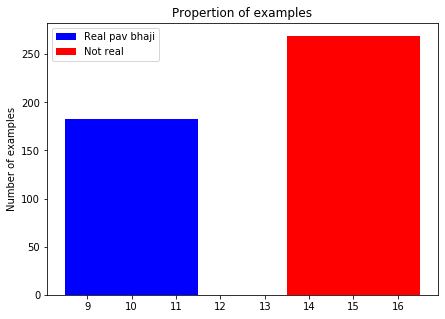

In [40]:
# bar plot of the 2 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real pav bhaji", color='blue')
plt.bar(15,Not_len,3, label="Not real", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

#### Scatter diag 

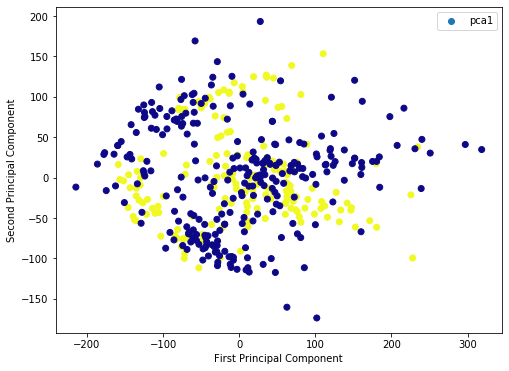

In [41]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
plt.scatter( dataset_master['f1'],dataset_master['f2'], c = y, cmap ='plasma') 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.legend(['pca1','pca2'])

#### Histogram 

Text(0.5, 1.0, 'Ranges and frequecies of our data')

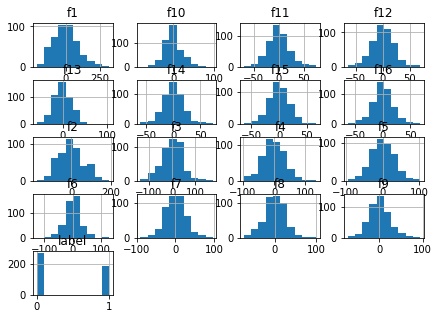

In [42]:
dataset_master.hist()
plt.title("Ranges and frequecies of our data")

#### Correlation betwwen features columns and target(label)

In [43]:
dataset_master.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
f1,1.000000e+00,0.000000e+00,-1.076436e-17,7.901685e-18,1.662391e-17,2.930030e-17,3.784794e-17,-2.526722e-17,3.469123e-17,-2.101423e-17,2.544090e-17,-5.980677e-18,-5.422628e-17,1.017765e-17,1.787903e-17,3.664578e-17,1.326433e-16
f2,0.000000e+00,1.000000e+00,7.105400e-17,1.598471e-18,-8.854233e-18,-7.167300e-18,5.683960e-18,1.000332e-17,-2.593234e-17,-6.091309e-17,1.688014e-17,-8.249051e-18,9.871297e-18,-2.332006e-17,9.472669e-18,-2.538994e-17,3.073868e-17
f3,-1.076436e-17,7.105400e-17,1.000000e+00,1.449125e-17,6.166100e-18,2.067973e-17,-2.509781e-17,1.620109e-17,9.381764e-18,1.264647e-16,3.292137e-17,-9.016433e-18,6.004667e-17,1.304865e-17,-3.284727e-17,-3.936738e-17,2.458830e-16
f4,7.901685e-18,1.598471e-18,1.449125e-17,1.000000e+00,-7.709077e-17,-6.939106e-18,-9.781097e-18,-6.167778e-18,-9.379137e-19,3.236507e-17,-2.879132e-17,-4.282626e-17,1.777854e-17,1.704139e-17,4.375131e-17,-1.051501e-17,4.233314e-16
f5,1.662391e-17,-8.854233e-18,6.166100e-18,-7.709077e-17,1.000000e+00,2.041597e-16,2.363887e-16,-6.353320e-18,-4.128300e-17,-5.247324e-17,1.745676e-17,-3.681816e-17,1.297633e-17,-4.108369e-17,2.418841e-17,3.609301e-17,-9.652717e-16
f6,2.930030e-17,-7.167300e-18,2.067973e-17,-6.939106e-18,2.041597e-16,1.000000e+00,-5.986354e-17,2.090421e-16,5.222143e-17,2.085216e-17,-2.272736e-16,1.861482e-17,-5.168519e-17,1.313392e-17,1.832938e-17,1.094921e-17,-1.030274e-15
f7,3.784794e-17,5.683960e-18,-2.509781e-17,-9.781097e-18,2.363887e-16,-5.986354e-17,1.000000e+00,5.954566e-17,-1.203687e-16,-2.810310e-16,-7.175283e-17,-9.081109e-17,-7.245326e-17,1.106983e-16,9.448856e-17,1.284010e-16,-8.329962e-16
f8,-2.526722e-17,1.000332e-17,1.620109e-17,-6.167778e-18,-6.353320e-18,2.090421e-16,5.954566e-17,1.000000e+00,2.144963e-16,1.044243e-16,-1.378209e-16,-9.792720e-17,1.448590e-16,-2.053245e-16,3.033677e-18,-2.109586e-16,-8.992210e-16
f9,3.469123e-17,-2.593234e-17,9.381764e-18,-9.379137e-19,-4.128300e-17,5.222143e-17,-1.203687e-16,2.144963e-16,1.000000e+00,8.018368e-17,-6.388001e-17,-2.288539e-16,-7.655227e-19,-1.454326e-16,7.414108e-17,-1.208359e-16,-4.727751e-16
f10,-2.101423e-17,-6.091309e-17,1.264647e-16,3.236507e-17,-5.247324e-17,2.085216e-17,-2.810310e-16,1.044243e-16,8.018368e-17,1.000000e+00,-2.103635e-16,4.992790e-16,4.575386e-16,3.397266e-17,2.097461e-16,-1.898390e-16,2.735621e-16


#### Correlation diag using seaborn.heatmap
* positive correlation
* negative correlation
* no correlation

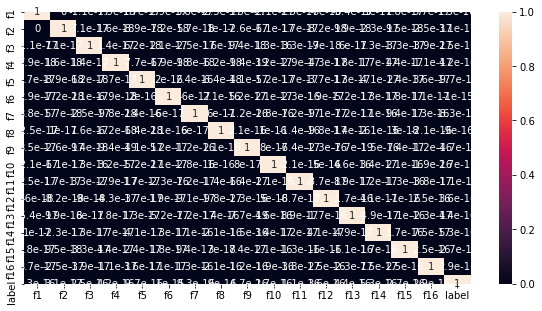

In [44]:
plt.figure(figsize=[10,5])
import seaborn as sns
sns.heatmap(dataset_master.corr(),annot=True)

### Range of data

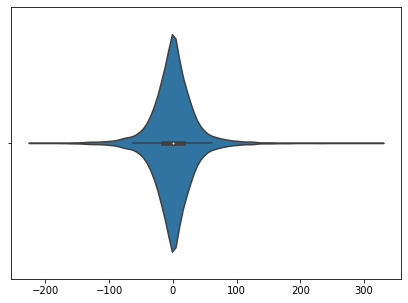

In [45]:
sns.violinplot(dataset_master)

### Find any outlier present in our data

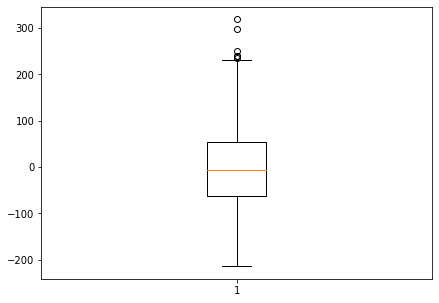

In [46]:
plt.boxplot(dataset_master['f1'])
cols = dataset_master.columns

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc1e92a2cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc1e92b3390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc1e92a29b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc1e92b3a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1e92b3d68>,
 'means': []}

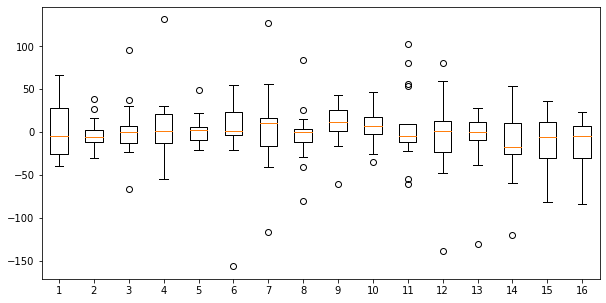

In [47]:
plt.figure(figsize=[10,5])
plt.boxplot(dataset_master.iloc[:16])

#### Splitting Training and Testing data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                                                random_state=40)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(max_depth =2)
dtf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
dtf.score(X_train, y_train)

0.6481994459833795

In [51]:
dtf.score(X_test,y_test)

0.6153846153846154

### Training our model using Other  Classifier
* Fitting Machine learning  algo and compare there training and testing score
* To check Data underfitting or Overfitting the model by comparing there score.
     * In underfitting condition- model accuracy is very low.
     * In Overfitting condtion- training  accuracy is high but testing accuracy is exponentially low as compare to training. 
* Chose the best algo suited for our model
* Find Accuracy score , confusion matrix, classsification report

In [52]:
lr = LogisticRegression()
rfc =RandomForestClassifier(n_estimators=10,max_depth=20)
lsvc = LinearSVC(C=0.01)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=35)

In [53]:
ml_model = []
ml_model.append(("LogisticRegression",lr))
ml_model.append(('RandomForestClassifier',rfc))
ml_model.append(('LinearSVC',lsvc))
ml_model.append(('GaussianNB',gnb))
ml_model.append(('KNN',knn))

In [54]:
for name, algo in ml_model:
    algo.fit(X_train,y_train)
    train_score=algo.score(X_train,y_train)
    test_score = algo.score(X_test,y_test)
    msg = "%s = (training score): %f (testing score:) %f"%(name,train_score,test_score)
    print(msg)

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression = (training score): 0.609418 (testing score:) 0.406593
RandomForestClassifier = (training score): 0.977839 (testing score:) 0.604396
LinearSVC = (training score): 0.548476 (testing score:) 0.417582
GaussianNB = (training score): 0.650970 (testing score:) 0.439560
KNN = (training score): 0.736842 (testing score:) 0.692308


## Deep Learning usin ANN

In [55]:
# Check the shape of training data
X_train.shape

(361, 16)

In [56]:
model = Sequential()
model.add(Dense(1000,activation='elu',input_shape = (16,)))
model.add(Dense(128,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(10,activation='softmax'))

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              17000     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 159,038
Trainable params: 159,038
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics =['accuracy'])

In [59]:
history = model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
361/361 [==============================] - 1s 2ms/step - loss: 2.1752 - accuracy: 0.5402
Epoch 2/1000
361/361 [==============================] - 0s 78us/step - loss: 0.7734 - accuracy: 0.7424
Epoch 3/1000
361/361 [==============================] - 0s 71us/step - loss: 0.3499 - accuracy: 0.8920
Epoch 4/1000
361/361 [==============================] - 0s 69us/step - loss: 0.1772 - accuracy: 0.9307
Epoch 5/1000
361/361 [==============================] - 0s 86us/step - loss: 0.1643 - accuracy: 0.9474
Epoch 6/1000
361/361 [==============================] - 0s 70us/step - loss: 0.0934 - accuracy: 0.9695
Epoch 7/1000
361/361 [==============================] - 0s 69us/step - loss: 0.0388 - accuracy: 0.9861
Epoch 8/1000
361/361 [==============================] - 0s 68us/step - loss: 0.0267 - accuracy: 0.9917
Epoch 9/1000
361/361 [==============================] - 0s 66us/step - loss: 0.0215 - accuracy: 0.9945
Epoch 10/1000
361/361 [==============================] - 0s 67us/step - lo

361/361 [==============================] - 0s 74us/step - loss: 2.1991e-04 - accuracy: 1.0000
Epoch 78/1000
361/361 [==============================] - 0s 76us/step - loss: 2.1527e-04 - accuracy: 1.0000
Epoch 79/1000
361/361 [==============================] - 0s 74us/step - loss: 2.1175e-04 - accuracy: 1.0000
Epoch 80/1000
361/361 [==============================] - 0s 73us/step - loss: 2.0782e-04 - accuracy: 1.0000
Epoch 81/1000
361/361 [==============================] - 0s 72us/step - loss: 2.0332e-04 - accuracy: 1.0000
Epoch 82/1000
361/361 [==============================] - 0s 74us/step - loss: 1.9945e-04 - accuracy: 1.0000
Epoch 83/1000
361/361 [==============================] - 0s 86us/step - loss: 1.9596e-04 - accuracy: 1.0000
Epoch 84/1000
361/361 [==============================] - 0s 75us/step - loss: 1.9250e-04 - accuracy: 1.0000
Epoch 85/1000
361/361 [==============================] - 0s 74us/step - loss: 1.8928e-04 - accuracy: 1.0000
Epoch 86/1000
361/361 [===================

361/361 [==============================] - 0s 74us/step - loss: 7.0989e-05 - accuracy: 1.0000
Epoch 153/1000
361/361 [==============================] - 0s 74us/step - loss: 7.0203e-05 - accuracy: 1.0000
Epoch 154/1000
361/361 [==============================] - 0s 74us/step - loss: 6.9207e-05 - accuracy: 1.0000
Epoch 155/1000
361/361 [==============================] - 0s 72us/step - loss: 6.8463e-05 - accuracy: 1.0000
Epoch 156/1000
361/361 [==============================] - 0s 73us/step - loss: 6.7758e-05 - accuracy: 1.0000
Epoch 157/1000
361/361 [==============================] - 0s 73us/step - loss: 6.6908e-05 - accuracy: 1.0000
Epoch 158/1000
361/361 [==============================] - 0s 73us/step - loss: 6.6090e-05 - accuracy: 1.0000
Epoch 159/1000
361/361 [==============================] - 0s 72us/step - loss: 6.5283e-05 - accuracy: 1.0000
Epoch 160/1000
361/361 [==============================] - 0s 73us/step - loss: 6.4518e-05 - accuracy: 1.0000
Epoch 161/1000
361/361 [==========

361/361 [==============================] - 0s 80us/step - loss: 3.1592e-05 - accuracy: 1.0000
Epoch 228/1000
361/361 [==============================] - 0s 76us/step - loss: 3.1277e-05 - accuracy: 1.0000
Epoch 229/1000
361/361 [==============================] - 0s 75us/step - loss: 3.0980e-05 - accuracy: 1.0000
Epoch 230/1000
361/361 [==============================] - 0s 89us/step - loss: 3.0682e-05 - accuracy: 1.0000
Epoch 231/1000
361/361 [==============================] - 0s 85us/step - loss: 3.0372e-05 - accuracy: 1.0000
Epoch 232/1000
361/361 [==============================] - 0s 76us/step - loss: 3.0102e-05 - accuracy: 1.0000
Epoch 233/1000
361/361 [==============================] - 0s 76us/step - loss: 2.9807e-05 - accuracy: 1.0000
Epoch 234/1000
361/361 [==============================] - 0s 75us/step - loss: 2.9521e-05 - accuracy: 1.0000
Epoch 235/1000
361/361 [==============================] - 0s 75us/step - loss: 2.9219e-05 - accuracy: 1.0000
Epoch 236/1000
361/361 [==========

361/361 [==============================] - 0s 75us/step - loss: 1.6040e-05 - accuracy: 1.0000
Epoch 303/1000
361/361 [==============================] - 0s 77us/step - loss: 1.5903e-05 - accuracy: 1.0000
Epoch 304/1000
361/361 [==============================] - 0s 76us/step - loss: 1.5765e-05 - accuracy: 1.0000
Epoch 305/1000
361/361 [==============================] - 0s 78us/step - loss: 1.5633e-05 - accuracy: 1.0000
Epoch 306/1000
361/361 [==============================] - 0s 112us/step - loss: 1.5513e-05 - accuracy: 1.0000
Epoch 307/1000
361/361 [==============================] - 0s 79us/step - loss: 1.5383e-05 - accuracy: 1.0000
Epoch 308/1000
361/361 [==============================] - 0s 106us/step - loss: 1.5265e-05 - accuracy: 1.0000
Epoch 309/1000
361/361 [==============================] - 0s 81us/step - loss: 1.5131e-05 - accuracy: 1.0000
Epoch 310/1000
361/361 [==============================] - 0s 89us/step - loss: 1.5009e-05 - accuracy: 1.0000
Epoch 311/1000
361/361 [========

361/361 [==============================] - 0s 73us/step - loss: 8.7698e-06 - accuracy: 1.0000
Epoch 378/1000
361/361 [==============================] - 0s 92us/step - loss: 8.7137e-06 - accuracy: 1.0000
Epoch 379/1000
361/361 [==============================] - 0s 97us/step - loss: 8.6457e-06 - accuracy: 1.0000
Epoch 380/1000
361/361 [==============================] - 0s 80us/step - loss: 8.5843e-06 - accuracy: 1.0000
Epoch 381/1000
361/361 [==============================] - 0s 77us/step - loss: 8.5050e-06 - accuracy: 1.0000
Epoch 382/1000
361/361 [==============================] - 0s 79us/step - loss: 8.4363e-06 - accuracy: 1.0000
Epoch 383/1000
361/361 [==============================] - 0s 77us/step - loss: 8.3700e-06 - accuracy: 1.0000
Epoch 384/1000
361/361 [==============================] - 0s 80us/step - loss: 8.3076e-06 - accuracy: 1.0000
Epoch 385/1000
361/361 [==============================] - 0s 82us/step - loss: 8.2448e-06 - accuracy: 1.0000
Epoch 386/1000
361/361 [==========

361/361 [==============================] - 0s 77us/step - loss: 5.0427e-06 - accuracy: 1.0000
Epoch 453/1000
361/361 [==============================] - 0s 79us/step - loss: 5.0064e-06 - accuracy: 1.0000
Epoch 454/1000
361/361 [==============================] - 0s 80us/step - loss: 4.9661e-06 - accuracy: 1.0000
Epoch 455/1000
361/361 [==============================] - 0s 78us/step - loss: 4.9278e-06 - accuracy: 1.0000
Epoch 456/1000
361/361 [==============================] - 0s 77us/step - loss: 4.8912e-06 - accuracy: 1.0000
Epoch 457/1000
361/361 [==============================] - 0s 77us/step - loss: 4.8598e-06 - accuracy: 1.0000
Epoch 458/1000
361/361 [==============================] - 0s 88us/step - loss: 4.8278e-06 - accuracy: 1.0000
Epoch 459/1000
361/361 [==============================] - 0s 89us/step - loss: 4.7961e-06 - accuracy: 1.0000
Epoch 460/1000
361/361 [==============================] - 0s 100us/step - loss: 4.7611e-06 - accuracy: 1.0000
Epoch 461/1000
361/361 [=========

361/361 [==============================] - 0s 103us/step - loss: 2.9551e-06 - accuracy: 1.0000
Epoch 528/1000
361/361 [==============================] - 0s 80us/step - loss: 2.9442e-06 - accuracy: 1.0000
Epoch 529/1000
361/361 [==============================] - 0s 78us/step - loss: 2.9204e-06 - accuracy: 1.0000
Epoch 530/1000
361/361 [==============================] - 0s 75us/step - loss: 2.8963e-06 - accuracy: 1.0000
Epoch 531/1000
361/361 [==============================] - 0s 76us/step - loss: 2.8775e-06 - accuracy: 1.0000
Epoch 532/1000
361/361 [==============================] - 0s 76us/step - loss: 2.8584e-06 - accuracy: 1.0000
Epoch 533/1000
361/361 [==============================] - 0s 77us/step - loss: 2.8392e-06 - accuracy: 1.0000
Epoch 534/1000
361/361 [==============================] - 0s 75us/step - loss: 2.8237e-06 - accuracy: 1.0000
Epoch 535/1000
361/361 [==============================] - 0s 76us/step - loss: 2.8026e-06 - accuracy: 1.0000
Epoch 536/1000
361/361 [=========

361/361 [==============================] - 0s 77us/step - loss: 1.7753e-06 - accuracy: 1.0000
Epoch 603/1000
361/361 [==============================] - 0s 82us/step - loss: 1.7653e-06 - accuracy: 1.0000
Epoch 604/1000
361/361 [==============================] - 0s 88us/step - loss: 1.7511e-06 - accuracy: 1.0000
Epoch 605/1000
361/361 [==============================] - 0s 78us/step - loss: 1.7379e-06 - accuracy: 1.0000
Epoch 606/1000
361/361 [==============================] - 0s 78us/step - loss: 1.7247e-06 - accuracy: 1.0000
Epoch 607/1000
361/361 [==============================] - 0s 79us/step - loss: 1.7135e-06 - accuracy: 1.0000
Epoch 608/1000
361/361 [==============================] - 0s 78us/step - loss: 1.7013e-06 - accuracy: 1.0000
Epoch 609/1000
361/361 [==============================] - 0s 76us/step - loss: 1.6950e-06 - accuracy: 1.0000
Epoch 610/1000
361/361 [==============================] - 0s 77us/step - loss: 1.6782e-06 - accuracy: 1.0000
Epoch 611/1000
361/361 [==========

361/361 [==============================] - 0s 86us/step - loss: 1.0699e-06 - accuracy: 1.0000
Epoch 678/1000
361/361 [==============================] - 0s 80us/step - loss: 1.0623e-06 - accuracy: 1.0000
Epoch 679/1000
361/361 [==============================] - 0s 80us/step - loss: 1.0557e-06 - accuracy: 1.0000
Epoch 680/1000
361/361 [==============================] - 0s 80us/step - loss: 1.0488e-06 - accuracy: 1.0000
Epoch 681/1000
361/361 [==============================] - 0s 79us/step - loss: 1.0415e-06 - accuracy: 1.0000
Epoch 682/1000
361/361 [==============================] - 0s 90us/step - loss: 1.0346e-06 - accuracy: 1.0000
Epoch 683/1000
361/361 [==============================] - 0s 83us/step - loss: 1.0250e-06 - accuracy: 1.0000
Epoch 684/1000
361/361 [==============================] - 0s 87us/step - loss: 1.0197e-06 - accuracy: 1.0000
Epoch 685/1000
361/361 [==============================] - 0s 114us/step - loss: 1.0138e-06 - accuracy: 1.0000
Epoch 686/1000
361/361 [=========

361/361 [==============================] - 0s 83us/step - loss: 6.4624e-07 - accuracy: 1.0000
Epoch 753/1000
361/361 [==============================] - 0s 81us/step - loss: 6.4195e-07 - accuracy: 1.0000
Epoch 754/1000
361/361 [==============================] - 0s 80us/step - loss: 6.3864e-07 - accuracy: 1.0000
Epoch 755/1000
361/361 [==============================] - 0s 82us/step - loss: 6.3435e-07 - accuracy: 1.0000
Epoch 756/1000
361/361 [==============================] - 0s 80us/step - loss: 6.3105e-07 - accuracy: 1.0000
Epoch 757/1000
361/361 [==============================] - 0s 80us/step - loss: 6.2676e-07 - accuracy: 1.0000
Epoch 758/1000
361/361 [==============================] - 0s 80us/step - loss: 6.2213e-07 - accuracy: 1.0000
Epoch 759/1000
361/361 [==============================] - 0s 80us/step - loss: 6.1718e-07 - accuracy: 1.0000
Epoch 760/1000
361/361 [==============================] - 0s 88us/step - loss: 6.1322e-07 - accuracy: 1.0000
Epoch 761/1000
361/361 [==========

361/361 [==============================] - 0s 80us/step - loss: 3.9263e-07 - accuracy: 1.0000
Epoch 828/1000
361/361 [==============================] - 0s 82us/step - loss: 3.8933e-07 - accuracy: 1.0000
Epoch 829/1000
361/361 [==============================] - 0s 87us/step - loss: 3.8669e-07 - accuracy: 1.0000
Epoch 830/1000
361/361 [==============================] - 0s 92us/step - loss: 3.8570e-07 - accuracy: 1.0000
Epoch 831/1000
361/361 [==============================] - 0s 117us/step - loss: 3.8338e-07 - accuracy: 1.0000
Epoch 832/1000
361/361 [==============================] - 0s 98us/step - loss: 3.7777e-07 - accuracy: 1.0000
Epoch 833/1000
361/361 [==============================] - 0s 87us/step - loss: 3.7546e-07 - accuracy: 1.0000
Epoch 834/1000
361/361 [==============================] - 0s 81us/step - loss: 3.7249e-07 - accuracy: 1.0000
Epoch 835/1000
361/361 [==============================] - 0s 82us/step - loss: 3.7150e-07 - accuracy: 1.0000
Epoch 836/1000
361/361 [=========

361/361 [==============================] - 0s 97us/step - loss: 2.3280e-07 - accuracy: 1.0000
Epoch 903/1000
361/361 [==============================] - 0s 82us/step - loss: 2.3016e-07 - accuracy: 1.0000
Epoch 904/1000
361/361 [==============================] - 0s 80us/step - loss: 2.2917e-07 - accuracy: 1.0000
Epoch 905/1000
361/361 [==============================] - 0s 81us/step - loss: 2.2752e-07 - accuracy: 1.0000
Epoch 906/1000
361/361 [==============================] - 0s 80us/step - loss: 2.2785e-07 - accuracy: 1.0000
Epoch 907/1000
361/361 [==============================] - 0s 84us/step - loss: 2.2587e-07 - accuracy: 1.0000
Epoch 908/1000
361/361 [==============================] - 0s 95us/step - loss: 2.2587e-07 - accuracy: 1.0000
Epoch 909/1000
361/361 [==============================] - 0s 81us/step - loss: 2.2356e-07 - accuracy: 1.0000
Epoch 910/1000
361/361 [==============================] - 0s 82us/step - loss: 2.2224e-07 - accuracy: 1.0000
Epoch 911/1000
361/361 [==========

361/361 [==============================] - 0s 81us/step - loss: 1.4100e-07 - accuracy: 1.0000
Epoch 978/1000
361/361 [==============================] - 0s 80us/step - loss: 1.4067e-07 - accuracy: 1.0000
Epoch 979/1000
361/361 [==============================] - 0s 79us/step - loss: 1.3935e-07 - accuracy: 1.0000
Epoch 980/1000
361/361 [==============================] - 0s 81us/step - loss: 1.3836e-07 - accuracy: 1.0000
Epoch 981/1000
361/361 [==============================] - 0s 78us/step - loss: 1.3803e-07 - accuracy: 1.0000
Epoch 982/1000
361/361 [==============================] - 0s 79us/step - loss: 1.3737e-07 - accuracy: 1.0000
Epoch 983/1000
361/361 [==============================] - 0s 81us/step - loss: 1.3737e-07 - accuracy: 1.0000
Epoch 984/1000
361/361 [==============================] - 0s 79us/step - loss: 1.3572e-07 - accuracy: 1.0000
Epoch 985/1000
361/361 [==============================] - 0s 78us/step - loss: 1.3473e-07 - accuracy: 1.0000
Epoch 986/1000
361/361 [==========

### Visualize the training loss and training validation accuracy to see if the model is overfitting
* Accuracy for training dataset = 100%
* Loss reduce upto =1.1128e-07

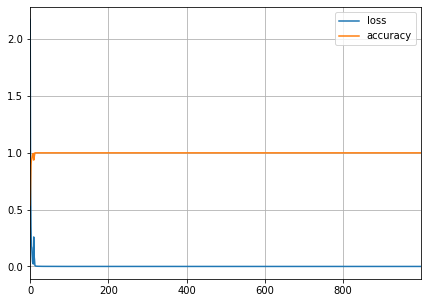

In [60]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim()
plt.show()

In [87]:
test_acc =model.evaluate(X_test,y_test)

91/91 [==============================] - 0s 81us/step


In [88]:
print("Loss and Accuracy of testing data =",test_acc)

Loss and Accuracy of testing data = [7.979632188985636, 0.7802197933197021]


In [89]:
predict = model.predict_classes(X_test)

In [90]:
predict

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1])

In [91]:
y_test

array([0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1.])

### Confusion Matrix define-:
* True Negative
* False Positive
* False Negative
* True Positive
        * All diagonal element are correct prediction rest are incorrect 
        * Sum of all correct prediction(diagonal data) divided by sum of all the data(correct or wrong prediction data)

In [66]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predict)

array([[41, 12],
       [ 9, 29]])

#### Define 
* precision-:precision is the fraction of relevant instances among the retrieved instances
* recall:-while recall is the fraction of the total amount of relevant instances that were actually retrieved
* f1-score-:F1 is an overall measure of a model’s accuracy that combines precision and recall, in that weird way that addition and multiplication just mix two ingredients to make a separate dish altogether

In [67]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80        53
         1.0       0.71      0.76      0.73        38

   micro avg       0.77      0.77      0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### Implement CNN using Keras

## Convolutional Neural Network
* CNN is used for image classification, object detection

* ![](https://preview.ibb.co/nRkBpp/gec2.jpg)

### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information.
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]

![](https://image.ibb.co/m4FQC9/gec.jpg)

* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
### Same Padding


* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
![](https://preview.ibb.co/noH5Up/padding.jpg)

### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting.
* ![](https://preview.ibb.co/gsNYFU/maxpool.jpg)

### Flattening
![](https://image.ibb.co/c7eVvU/flattenigng.jpg)

### Full Connection
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network

![](https://preview.ibb.co/evzsAU/fullyc.jpg)

### Implement Deep Learning  using Keras
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training

In [68]:
X_train.shape

(361, 16)

In [69]:
X_test.shape

(91, 16)

#### Reshaping 2_dim to 4_dim so that our convolutinal 2D layer can work 

In [70]:
X_train = X_train.reshape(361,4,4,1)
X_test = X_test.reshape(91,4,4,1)

In [93]:
X = X.reshape(452,4,4,1)

In [71]:
X_train.shape

(361, 4, 4, 1)

#### Define the Model

In [72]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (4,4,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

### Set the optimizer and annealer
Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm.

We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy".

The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss.

I choosed RMSprop (with default values), it is a very effective optimizer. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. We could also have used Stochastic Gradient Descent ('sgd') optimizer, but it is slower than RMSprop.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

In [73]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [74]:
# Compile the model
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [75]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [76]:
epochs = 1000
batch_size = 100

In [77]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test), verbose = 2)

Train on 361 samples, validate on 91 samples
Epoch 1/1000
 - 1s - loss: 1.6475 - accuracy: 0.4321 - val_loss: 0.9417 - val_accuracy: 0.4396
Epoch 2/1000
 - 0s - loss: 0.9733 - accuracy: 0.5291 - val_loss: 0.8506 - val_accuracy: 0.5824
Epoch 3/1000
 - 0s - loss: 0.8948 - accuracy: 0.5789 - val_loss: 0.7212 - val_accuracy: 0.5824
Epoch 4/1000
 - 0s - loss: 0.7868 - accuracy: 0.5789 - val_loss: 0.8921 - val_accuracy: 0.4286
Epoch 5/1000
 - 0s - loss: 0.8621 - accuracy: 0.5512 - val_loss: 0.7191 - val_accuracy: 0.5824
Epoch 6/1000
 - 0s - loss: 0.6978 - accuracy: 0.6343 - val_loss: 0.8836 - val_accuracy: 0.4176
Epoch 7/1000
 - 0s - loss: 0.7191 - accuracy: 0.6150 - val_loss: 0.6855 - val_accuracy: 0.6484
Epoch 8/1000
 - 0s - loss: 0.7229 - accuracy: 0.6288 - val_loss: 0.6861 - val_accuracy: 0.6154
Epoch 9/1000
 - 0s - loss: 0.5517 - accuracy: 0.7368 - val_loss: 0.6771 - val_accuracy: 0.7143
Epoch 10/1000
 - 0s - loss: 0.5609 - accuracy: 0.7396 - val_loss: 0.7408 - val_accuracy: 0.6264
Epoc

Epoch 86/1000
 - 0s - loss: 0.0201 - accuracy: 0.9945 - val_loss: 1.6256 - val_accuracy: 0.7582
Epoch 87/1000
 - 0s - loss: 0.0049 - accuracy: 0.9972 - val_loss: 1.7459 - val_accuracy: 0.7363
Epoch 88/1000
 - 0s - loss: 0.0125 - accuracy: 0.9917 - val_loss: 1.9153 - val_accuracy: 0.7582
Epoch 89/1000
 - 0s - loss: 0.0137 - accuracy: 0.9917 - val_loss: 2.3345 - val_accuracy: 0.7033
Epoch 90/1000
 - 0s - loss: 0.0073 - accuracy: 0.9972 - val_loss: 2.0233 - val_accuracy: 0.7363
Epoch 91/1000
 - 0s - loss: 0.0326 - accuracy: 0.9861 - val_loss: 3.2926 - val_accuracy: 0.6593
Epoch 92/1000
 - 0s - loss: 0.0378 - accuracy: 0.9917 - val_loss: 2.1779 - val_accuracy: 0.7582
Epoch 93/1000
 - 0s - loss: 0.0575 - accuracy: 0.9778 - val_loss: 1.6075 - val_accuracy: 0.7473
Epoch 94/1000
 - 0s - loss: 0.0229 - accuracy: 0.9945 - val_loss: 1.8549 - val_accuracy: 0.7802
Epoch 95/1000
 - 0s - loss: 0.0107 - accuracy: 0.9972 - val_loss: 2.1032 - val_accuracy: 0.7582
Epoch 96/1000
 - 0s - loss: 0.0014 - acc

Epoch 170/1000
 - 0s - loss: 0.3272 - accuracy: 0.9474 - val_loss: 2.1363 - val_accuracy: 0.7473
Epoch 171/1000
 - 0s - loss: 0.0079 - accuracy: 0.9972 - val_loss: 2.1246 - val_accuracy: 0.7692
Epoch 172/1000
 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.1745 - val_accuracy: 0.7692
Epoch 173/1000
 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.1972 - val_accuracy: 0.7692
Epoch 174/1000
 - 0s - loss: 5.7800e-04 - accuracy: 1.0000 - val_loss: 2.2253 - val_accuracy: 0.7582
Epoch 175/1000
 - 0s - loss: 7.0045e-04 - accuracy: 1.0000 - val_loss: 2.2799 - val_accuracy: 0.7582
Epoch 176/1000
 - 0s - loss: 0.0149 - accuracy: 0.9972 - val_loss: 2.1525 - val_accuracy: 0.7582
Epoch 177/1000
 - 0s - loss: 2.1169e-04 - accuracy: 1.0000 - val_loss: 2.1877 - val_accuracy: 0.7363
Epoch 178/1000
 - 0s - loss: 3.7894e-04 - accuracy: 1.0000 - val_loss: 2.2804 - val_accuracy: 0.7363
Epoch 179/1000
 - 0s - loss: 0.0087 - accuracy: 0.9972 - val_loss: 2.4261 - val_accuracy: 0.7363
Epoch 180/1000

Epoch 254/1000
 - 0s - loss: 0.0330 - accuracy: 0.9972 - val_loss: 2.9469 - val_accuracy: 0.7363
Epoch 255/1000
 - 0s - loss: 0.0078 - accuracy: 0.9972 - val_loss: 3.0816 - val_accuracy: 0.7473
Epoch 256/1000
 - 0s - loss: 0.0178 - accuracy: 0.9972 - val_loss: 3.7388 - val_accuracy: 0.6923
Epoch 257/1000
 - 0s - loss: 2.2637e-04 - accuracy: 1.0000 - val_loss: 3.5837 - val_accuracy: 0.7143
Epoch 258/1000
 - 0s - loss: 1.3141e-04 - accuracy: 1.0000 - val_loss: 3.5501 - val_accuracy: 0.6923
Epoch 259/1000
 - 0s - loss: 0.0181 - accuracy: 0.9945 - val_loss: 3.3828 - val_accuracy: 0.7363
Epoch 260/1000
 - 0s - loss: 0.0043 - accuracy: 0.9972 - val_loss: 4.2233 - val_accuracy: 0.7143
Epoch 261/1000
 - 0s - loss: 0.0333 - accuracy: 0.9945 - val_loss: 3.7525 - val_accuracy: 0.7473
Epoch 262/1000
 - 0s - loss: 4.6433e-04 - accuracy: 1.0000 - val_loss: 3.4247 - val_accuracy: 0.7143
Epoch 263/1000
 - 0s - loss: 1.2929e-04 - accuracy: 1.0000 - val_loss: 3.4851 - val_accuracy: 0.7253
Epoch 264/1000

Epoch 337/1000
 - 0s - loss: 9.8046e-05 - accuracy: 1.0000 - val_loss: 4.8715 - val_accuracy: 0.6923
Epoch 338/1000
 - 0s - loss: 6.4446e-06 - accuracy: 1.0000 - val_loss: 4.8666 - val_accuracy: 0.6923
Epoch 339/1000
 - 0s - loss: 0.0157 - accuracy: 0.9972 - val_loss: 6.5906 - val_accuracy: 0.7033
Epoch 340/1000
 - 0s - loss: 0.0078 - accuracy: 0.9972 - val_loss: 5.0909 - val_accuracy: 0.7033
Epoch 341/1000
 - 0s - loss: 0.0634 - accuracy: 0.9972 - val_loss: 5.3093 - val_accuracy: 0.7363
Epoch 342/1000
 - 0s - loss: 4.2766e-05 - accuracy: 1.0000 - val_loss: 5.2722 - val_accuracy: 0.7253
Epoch 343/1000
 - 0s - loss: 0.0147 - accuracy: 0.9945 - val_loss: 5.8147 - val_accuracy: 0.7253
Epoch 344/1000
 - 0s - loss: 0.0695 - accuracy: 0.9945 - val_loss: 5.1181 - val_accuracy: 0.7253
Epoch 345/1000
 - 0s - loss: 0.0097 - accuracy: 0.9972 - val_loss: 4.5717 - val_accuracy: 0.7143
Epoch 346/1000
 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.8464 - val_accuracy: 0.7253
Epoch 347/1000
 - 

Epoch 420/1000
 - 0s - loss: 4.9787e-05 - accuracy: 1.0000 - val_loss: 3.5992 - val_accuracy: 0.7473
Epoch 421/1000
 - 0s - loss: 0.0030 - accuracy: 0.9972 - val_loss: 4.2669 - val_accuracy: 0.7582
Epoch 422/1000
 - 0s - loss: 0.0474 - accuracy: 0.9945 - val_loss: 4.4022 - val_accuracy: 0.7582
Epoch 423/1000
 - 0s - loss: 0.0049 - accuracy: 0.9945 - val_loss: 4.1328 - val_accuracy: 0.7692
Epoch 424/1000
 - 0s - loss: 0.0218 - accuracy: 0.9945 - val_loss: 3.8646 - val_accuracy: 0.7692
Epoch 425/1000
 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 3.9438 - val_accuracy: 0.7912
Epoch 426/1000
 - 0s - loss: 2.7973e-04 - accuracy: 1.0000 - val_loss: 3.9890 - val_accuracy: 0.7802
Epoch 427/1000
 - 0s - loss: 4.3506e-05 - accuracy: 1.0000 - val_loss: 4.0104 - val_accuracy: 0.7802
Epoch 428/1000
 - 0s - loss: 9.4276e-06 - accuracy: 1.0000 - val_loss: 4.0250 - val_accuracy: 0.7802
Epoch 429/1000
 - 0s - loss: 0.0327 - accuracy: 0.9917 - val_loss: 3.2761 - val_accuracy: 0.7912
Epoch 430/1000

Epoch 503/1000
 - 0s - loss: 1.2393e-04 - accuracy: 1.0000 - val_loss: 5.5046 - val_accuracy: 0.7143
Epoch 504/1000
 - 0s - loss: 0.0182 - accuracy: 0.9972 - val_loss: 4.9025 - val_accuracy: 0.7363
Epoch 505/1000
 - 0s - loss: 2.1109e-05 - accuracy: 1.0000 - val_loss: 5.0454 - val_accuracy: 0.7363
Epoch 506/1000
 - 0s - loss: 0.0587 - accuracy: 0.9861 - val_loss: 3.8691 - val_accuracy: 0.7802
Epoch 507/1000
 - 0s - loss: 0.0518 - accuracy: 0.9945 - val_loss: 3.3369 - val_accuracy: 0.7363
Epoch 508/1000
 - 0s - loss: 0.0107 - accuracy: 0.9917 - val_loss: 3.4699 - val_accuracy: 0.7692
Epoch 509/1000
 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.0080 - val_accuracy: 0.7363
Epoch 510/1000
 - 0s - loss: 6.7351e-05 - accuracy: 1.0000 - val_loss: 4.0033 - val_accuracy: 0.7363
Epoch 511/1000
 - 0s - loss: 4.2873e-04 - accuracy: 1.0000 - val_loss: 4.1684 - val_accuracy: 0.7363
Epoch 512/1000
 - 0s - loss: 0.0290 - accuracy: 0.9972 - val_loss: 3.6247 - val_accuracy: 0.7363
Epoch 513/1000

Epoch 586/1000
 - 0s - loss: 3.7176e-05 - accuracy: 1.0000 - val_loss: 5.9044 - val_accuracy: 0.7253
Epoch 587/1000
 - 0s - loss: 1.2680e-07 - accuracy: 1.0000 - val_loss: 5.9084 - val_accuracy: 0.7253
Epoch 588/1000
 - 0s - loss: 1.9445e-04 - accuracy: 1.0000 - val_loss: 6.0485 - val_accuracy: 0.7582
Epoch 589/1000
 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.2566 - val_accuracy: 0.7253
Epoch 590/1000
 - 0s - loss: 3.6100e-06 - accuracy: 1.0000 - val_loss: 6.3802 - val_accuracy: 0.7253
Epoch 591/1000
 - 0s - loss: 1.9734e-06 - accuracy: 1.0000 - val_loss: 6.2940 - val_accuracy: 0.7363
Epoch 592/1000
 - 0s - loss: 3.4343e-08 - accuracy: 1.0000 - val_loss: 6.2948 - val_accuracy: 0.7363
Epoch 593/1000
 - 0s - loss: 1.4265e-07 - accuracy: 1.0000 - val_loss: 6.2994 - val_accuracy: 0.7363
Epoch 594/1000
 - 0s - loss: 1.5611e-05 - accuracy: 1.0000 - val_loss: 6.4549 - val_accuracy: 0.7363
Epoch 595/1000
 - 0s - loss: 0.0087 - accuracy: 0.9945 - val_loss: 6.3373 - val_accuracy: 0.747

Epoch 669/1000
 - 0s - loss: 0.0045 - accuracy: 0.9972 - val_loss: 6.1770 - val_accuracy: 0.6923
Epoch 670/1000
 - 0s - loss: 6.6517e-05 - accuracy: 1.0000 - val_loss: 6.0319 - val_accuracy: 0.7033
Epoch 671/1000
 - 0s - loss: 6.2288e-05 - accuracy: 1.0000 - val_loss: 6.0451 - val_accuracy: 0.7033
Epoch 672/1000
 - 0s - loss: 0.0230 - accuracy: 0.9945 - val_loss: 7.0497 - val_accuracy: 0.7473
Epoch 673/1000
 - 0s - loss: 0.0331 - accuracy: 0.9889 - val_loss: 6.6267 - val_accuracy: 0.7692
Epoch 674/1000
 - 0s - loss: 0.0264 - accuracy: 0.9945 - val_loss: 6.3215 - val_accuracy: 0.7692
Epoch 675/1000
 - 0s - loss: 0.0027 - accuracy: 0.9972 - val_loss: 6.9929 - val_accuracy: 0.7253
Epoch 676/1000
 - 0s - loss: 0.0143 - accuracy: 0.9972 - val_loss: 6.5552 - val_accuracy: 0.7692
Epoch 677/1000
 - 0s - loss: 9.5158e-06 - accuracy: 1.0000 - val_loss: 6.5656 - val_accuracy: 0.7692
Epoch 678/1000
 - 0s - loss: 0.0299 - accuracy: 0.9972 - val_loss: 6.4849 - val_accuracy: 0.7143
Epoch 679/1000
 - 

Epoch 752/1000
 - 0s - loss: 1.5587e-05 - accuracy: 1.0000 - val_loss: 6.4798 - val_accuracy: 0.7033
Epoch 753/1000
 - 0s - loss: 0.0165 - accuracy: 0.9972 - val_loss: 5.1343 - val_accuracy: 0.7582
Epoch 754/1000
 - 0s - loss: 0.0327 - accuracy: 0.9945 - val_loss: 6.5360 - val_accuracy: 0.7363
Epoch 755/1000
 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.7655 - val_accuracy: 0.7363
Epoch 756/1000
 - 0s - loss: 3.1290e-06 - accuracy: 1.0000 - val_loss: 5.7467 - val_accuracy: 0.7363
Epoch 757/1000
 - 0s - loss: 9.7414e-08 - accuracy: 1.0000 - val_loss: 5.7494 - val_accuracy: 0.7363
Epoch 758/1000
 - 0s - loss: 0.0137 - accuracy: 0.9972 - val_loss: 4.8441 - val_accuracy: 0.7692
Epoch 759/1000
 - 0s - loss: 1.6769e-05 - accuracy: 1.0000 - val_loss: 4.9076 - val_accuracy: 0.7582
Epoch 760/1000
 - 0s - loss: 5.0166e-04 - accuracy: 1.0000 - val_loss: 5.1521 - val_accuracy: 0.7363
Epoch 761/1000
 - 0s - loss: 0.0041 - accuracy: 0.9972 - val_loss: 5.1527 - val_accuracy: 0.7802
Epoch 762/

Epoch 834/1000
 - 0s - loss: 6.0050e-05 - accuracy: 1.0000 - val_loss: 6.3838 - val_accuracy: 0.7692
Epoch 835/1000
 - 0s - loss: 1.2748e-06 - accuracy: 1.0000 - val_loss: 6.3875 - val_accuracy: 0.7802
Epoch 836/1000
 - 0s - loss: 3.0575e-06 - accuracy: 1.0000 - val_loss: 6.4479 - val_accuracy: 0.7582
Epoch 837/1000
 - 0s - loss: 2.1484e-06 - accuracy: 1.0000 - val_loss: 6.4854 - val_accuracy: 0.7582
Epoch 838/1000
 - 0s - loss: 4.4286e-04 - accuracy: 1.0000 - val_loss: 6.3972 - val_accuracy: 0.7802
Epoch 839/1000
 - 0s - loss: 7.2240e-06 - accuracy: 1.0000 - val_loss: 6.5469 - val_accuracy: 0.7692
Epoch 840/1000
 - 0s - loss: 2.9224e-07 - accuracy: 1.0000 - val_loss: 6.5684 - val_accuracy: 0.7692
Epoch 841/1000
 - 0s - loss: 1.0972e-06 - accuracy: 1.0000 - val_loss: 6.6258 - val_accuracy: 0.7692
Epoch 842/1000
 - 0s - loss: 0.0305 - accuracy: 0.9972 - val_loss: 6.4960 - val_accuracy: 0.7912
Epoch 843/1000
 - 0s - loss: 3.6170e-05 - accuracy: 1.0000 - val_loss: 6.9995 - val_accuracy: 0

 - 0s - loss: 1.7957e-05 - accuracy: 1.0000 - val_loss: 5.3573 - val_accuracy: 0.7912
Epoch 917/1000
 - 0s - loss: 4.2439e-05 - accuracy: 1.0000 - val_loss: 5.6364 - val_accuracy: 0.7473
Epoch 918/1000
 - 0s - loss: 5.4713e-06 - accuracy: 1.0000 - val_loss: 5.6562 - val_accuracy: 0.7582
Epoch 919/1000
 - 0s - loss: 2.9554e-07 - accuracy: 1.0000 - val_loss: 5.6685 - val_accuracy: 0.7582
Epoch 920/1000
 - 0s - loss: 4.4098e-05 - accuracy: 1.0000 - val_loss: 6.1419 - val_accuracy: 0.7912
Epoch 921/1000
 - 0s - loss: 1.0523e-05 - accuracy: 1.0000 - val_loss: 6.1404 - val_accuracy: 0.7912
Epoch 922/1000
 - 0s - loss: 4.7901e-06 - accuracy: 1.0000 - val_loss: 6.2535 - val_accuracy: 0.8022
Epoch 923/1000
 - 0s - loss: 3.7339e-05 - accuracy: 1.0000 - val_loss: 6.4954 - val_accuracy: 0.7473
Epoch 924/1000
 - 0s - loss: 0.0208 - accuracy: 0.9972 - val_loss: 6.5468 - val_accuracy: 0.8132
Epoch 925/1000
 - 0s - loss: 1.7515e-05 - accuracy: 1.0000 - val_loss: 6.5458 - val_accuracy: 0.7802
Epoch 926

Epoch 998/1000
 - 0s - loss: 3.9626e-09 - accuracy: 1.0000 - val_loss: 7.7775 - val_accuracy: 0.7802
Epoch 999/1000
 - 0s - loss: 3.6552e-06 - accuracy: 1.0000 - val_loss: 7.9595 - val_accuracy: 0.7802
Epoch 1000/1000
 - 0s - loss: 1.4067e-07 - accuracy: 1.0000 - val_loss: 7.9796 - val_accuracy: 0.7802


### Visualize the training loss and training validation accuracy to see if the model is overfitting
* Accuracy for training dataset = 100%
* Loss reduce upto =1.4067e-07 
* Val_accuracy = 0.7802
* val_loss = 7.9796 

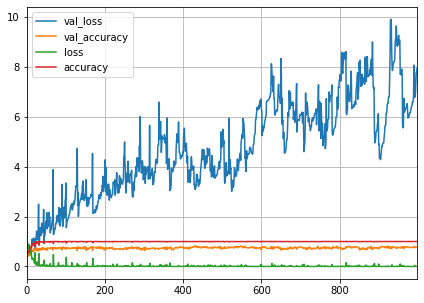

In [78]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim()
plt.show()

### Accuracy  and loss of all 452 dataset (Training + Testing)

In [94]:
model.evaluate(X,y)

452/452 [==============================] - 0s 48us/step


[1.60651881136487, 0.9557521939277649]

* Our accuracy is pretty well for all data sample  which is 95.57% hence our model can work on new data 

### predict test data

In [97]:
prediction =  model.predict_classes(X)

### Confusion Matrix define-:
* True Negative
* False Positive
* False Negative
* True Positive
        * All diagonal element are correct prediction rest are incorrect 
        * Sum of all correct prediction(diagonal data) divided by sum of all the data(correct or wrong prediction data)

In [105]:
from sklearn import metrics
metrics.confusion_matrix(y,prediction)

array([[260,   9],
       [ 11, 172]])

#### Define 
* precision-:precision is the fraction of relevant instances among the retrieved instances
* recall:-while recall is the fraction of the total amount of relevant instances that were actually retrieved
* f1-score-:F1 is an overall measure of a model’s accuracy that combines precision and recall, in that weird way that addition and multiplication just mix two ingredients to make a separate dish altogether

In [106]:
print(metrics.classification_report(y,prediction))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       269
         1.0       0.95      0.94      0.95       183

   micro avg       0.96      0.96      0.96       452
   macro avg       0.95      0.95      0.95       452
weighted avg       0.96      0.96      0.96       452



In [107]:
### convert priction array to dataframe formate

In [108]:
prediction = pd.DataFrame(prediction,columns=['Predict_Pav_Bhaji'])

In [109]:
# Top 5 rows of prediction
prediction.head()

,Predict_Pav_Bhaji
0,1
1,1
2,1
3,1
4,1


### Our final prediction submit using csv format

In [110]:
prediction.to_csv("sample_prediction.csv")